## Assignment 2 (Weeks 3-4) Notes

In [ ]:
#You are supposed to find the boxes that resultin the results shown in Table1 in the paper Rozenberg et al.
# Rozenberg did PRIM 5 times, (i.e. for SSP1, SSP2, SSP3, SSP4, SSP5)
#Need to set threshold a bit lower for this example (otherwise it will not work) (MILA says 2 and 5 fail, others work for threshold = 0.8)
#^^Because fo this, you may get slightly different results

In [ ]:
#Question:
#In assignment 4C, so for the Hamarat article, do you have to find the initial value of 'fraction renewables' in the article? I found 0.6, but not sure if that is right

#How to specify row, based on the given information here
data = outcomes['fraction renewables']
y = data[0,:] <data[-1,:]

#How would you deal with multiple rules; you would have to apply joint type to specify your conditions for success (Question posed earlier):
#Example

r1 = ooutcomes[y1] < t1
r2 = outcomes[y2] > t2
r3 = outcomes[y3] < t3
rc = r1 | r2 | r3

# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


## Bryant & Lempert (2010) Results 

### Scenario A: 
4 parameters:
- 1) transportation demand elasticity
- 2) biomass backstop price
- 3) biofuel production cost
- 4) supply of low-cost biomass

Note: 
- 1 (transportation demand elasticity) & 2 (biomass backstop price) should be at the upper half of their ranges
- 3 (biofuel production cost) should be anywehere above the lowest of its range
- 4 (supply of low-cost biomass) should be at the lowest half of its range

79% coverage, 73% density

In [2]:
#Bring in necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

In [14]:
#Change working directory to a specified directory
#os.chdir('../')
#print("Directory Changes")

#Get current working directory
cwd = os.getcwd()
data_path = os.getcwd() + 'Users\sahit\EPA1361\epa1361_open\Week 3-4 - vulnerability analysis\data'
print("Current working directory is:", cwd)

Current working directory is: C:\


In [18]:
print("Current data path is:", data_path)

Current data path is: C:\Users\sahit\EPA1361\epa1361_open\Week 3-4 - vulnerability analysis\data


In [16]:
data = pd.read_csv(data_path + '/Bryant et al 2010.csv', index_col=False)

In [19]:
#Gain insight into data
data.head()

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0


In [20]:
#Note: 
#We are trying to classify the outcomes of interest with unreasonably high costs.

#Bryant & Lempert (2010) says that they label the column 'Greater than 90%' equal to 1 when the cost was greater than 78 billion dollars for their 25 x 25 policy 
#to ID all outcomes with really high cost.
#In our dataset, the "high costs" is refering to "Expen change" (i.e. 'Expen change' >= 78)

data[data['Greater than 90%'] == 0].sort_values('Expen change', ascending = False)

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
573,0.25,1,110.699997,544.599976,0.50,93.099998,0.429,-0.426,0.07,-0.063,186.399994,1653,77.40,291.45,0,0
599,0.25,1,113.099999,465.399994,0.66,83.199997,0.587,-0.490,1.58,0.018,185.000000,1679,76.87,334.83,0,0
73,0.25,1,133.199997,577.599976,0.21,90.199997,0.438,-0.459,0.42,0.026,177.100006,1089,76.18,315.42,0,0
824,0.25,1,122.199997,929.599976,0.30,85.000000,0.386,-0.246,0.07,0.082,113.800003,1939,76.13,220.31,0,0
493,0.25,1,83.300003,722.799988,0.79,82.000000,0.202,-0.217,0.52,-0.091,122.599999,1560,75.81,208.42,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.25,1,67.000000,980.200012,0.74,99.900002,0.280,-0.265,0.31,0.002,122.599999,1692,3.02,31.90,1,0
84,0.25,1,82.500000,795.400024,0.97,99.500000,0.330,-0.735,0.58,0.014,168.300003,1102,2.20,51.61,1,0
449,0.25,1,74.800003,819.599976,0.28,93.800003,0.296,-0.716,1.92,0.024,193.800003,1511,2.15,51.01,1,0
296,0.25,1,72.400002,956.000000,0.39,96.199997,0.504,-0.798,0.24,0.065,94.400002,1345,0.54,38.39,1,0


### Method 1

In [24]:
#Replicate results from  Byrant & Lemptert (2010)

from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

x = data.iloc[:, 2:11] #Experiments in columns 2-10
y = data.iloc[:, 12] >78 #'Expen change' greater than 78 billion dollars

prim_alg1 = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1) #peel_alpha of 10% instead of 5%
box1 = prim_alg1.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


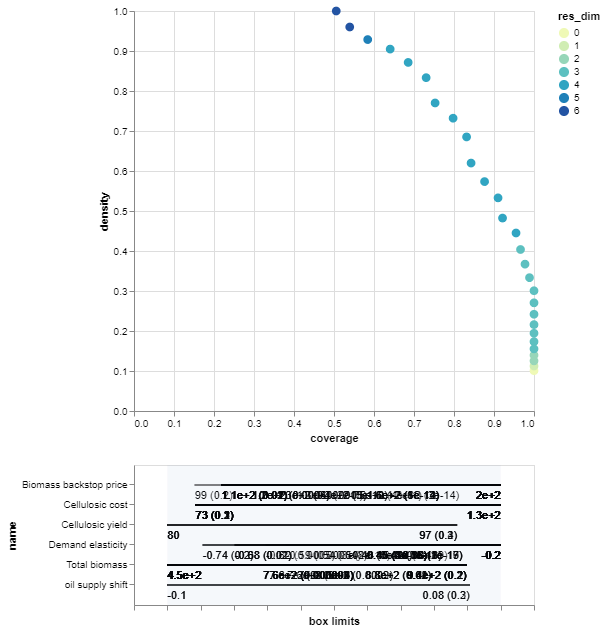

In [25]:
box1.inspect_tradeoff()

### Method 2

In [26]:
#Replicate results from  Byrant & Lemptert (2010)

from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

x = data.iloc[:, 2:11] #Experiments in columns 2-10
y = data.iloc[:, 15].values #Outcome in column 15

prim_alg2 = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1) #peel_alpha of 10% instead of 5%
box2 = prim_alg2.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


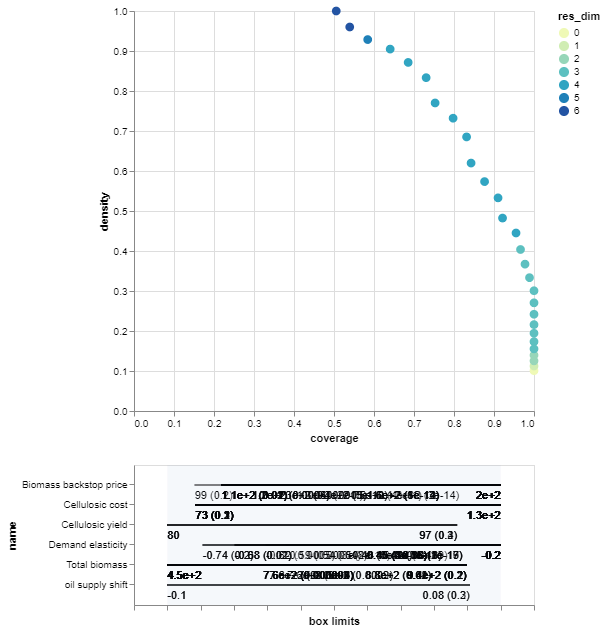

In [27]:
box2.inspect_tradeoff()

### Question for Bramka:
If we run with just 'y = data.iloc[:, 15].values' then whatever is counted as a case of interest is only counted as 1s (i.e. 89 cases of interest).
Thus, we get the same results when compared to when we run 'y = data.iloc[:, 15].values ==1'.
Does this mean that the PRIM alorgorithm discounts any value that is 0 and then it would be redundent to use ==1?

Potential answer: The PRIM functions accepts only binary classification of outcomes i.e. 0 or 1. Therefore, any result obtained should already be converted into 0s and 1s before feeding into the PRIM function. This is why Method 1 and Method 2 have the same results right now

[MainProcess/INFO] resample 0
C:\Users\sahit\Anaconda\lib\site-packages\pandas\core\series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9


                          reproduce coverage  reproduce density
Electricity coproduction                80.0              100.0
Cellulosic cost                         80.0               90.0
Demand elasticity                       70.0              100.0
oil supply shift                        70.0               80.0
Cellulosic yield                        60.0               90.0
Biomass backstop price                  60.0               90.0
Oil elasticity                          50.0               50.0
Feedstock distribution                  40.0               80.0
Total biomass                           30.0               60.0
coverage     0.752809
density      0.770115
id                 21
mass        0.0986395
mean         0.770115
res_dim             4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.79998

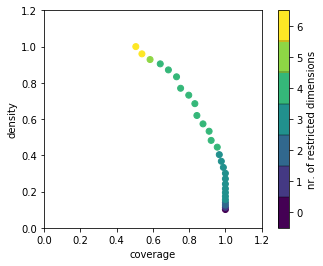

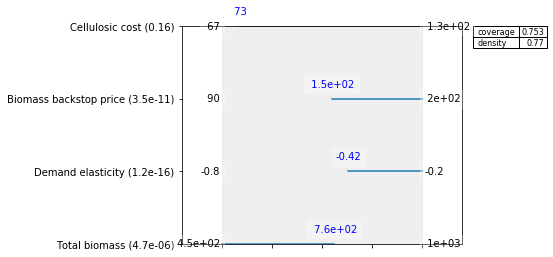

In [28]:
#Plot peeling trajectory
box1.show_tradeoff()

#Inspect candidate box 21, i.e. Scenario A from Bryant & Lemptert 2010
print(box1.resample(21))
box1.inspect(21)
box1.inspect(21, style='graph')

plt.show()

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP (Shared Socio-economic Pathways).
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


### Rozenberg et al. (2014) Results

SSP1
- 70% coverage, 65% density

SSP2
- 45% coverage, 40% density

SSP3
- 80% coverage, 65% density

SSP4
- 90% coverage, 90% density

SSP5
- 50% coverage, 75% density

In [ ]:
#Chose indicators 2 for mitigation and 2 for adaptation

#Mitigation
#baseline CO2 emissions
#GDP losses

#Adaptation
#income fo the 20 % poorest countries in African countries, India, South America (not Brasil), and South East Asia
#Share of jobs in agriculture in developing countries

In [59]:
data_rozenberg = pd.read_csv(data_path + '/Rozenberg et al 2014.csv', index_col=False)

In [60]:
#Gain insight into data
data_rozenberg.head()

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0


In [117]:
#Replicate results from Rozenberg et al. (2014)

#SSP1, SSP2, SSP3, SSP4, SSP5
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

x = data_rozenberg.iloc[:, 0:7] #Experiments in columns 1-7 (x is the same for all SSP because we classify for each SSP based on the columns)

SSP1 = data_rozenberg.iloc[:, 7].values 
SSP2 = data_rozenberg.iloc[:, 8].values 
SSP3 = data_rozenberg.iloc[:, 9].values 
SSP4 = data_rozenberg.iloc[:, 10].values 
SSP5 = data_rozenberg.iloc[:, 11].values 

#SSP1
prim_alg_ssp1 = prim.Prim(x, SSP1, threshold=0.6, peel_alpha=0.1)
box1_ssp1 = prim_alg_ssp1.find_box()

#SSP2
prim_alg_ssp2 = prim.Prim(x, SSP2, threshold=0.3, peel_alpha=0.05) 
box1_ssp2 = prim_alg_ssp2.find_box()

#SSP3
prim_alg_ssp3 = prim.Prim(x, SSP3, threshold=0.8, peel_alpha=0.1) 
box1_ssp3 = prim_alg_ssp3.find_box()

#SSP4
prim_alg_ssp4 = prim.Prim(x, SSP4, threshold=0.8, peel_alpha=0.1) 
box1_ssp4 = prim_alg_ssp4.find_box()

#SSP5
prim_alg_ssp5 = prim.Prim(x, SSP5, threshold=0.4, peel_alpha=0.05)
box1_ssp5 = prim_alg_ssp5.find_box()

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 0.5625, mass: 0.055944055944055944, coverage: 0.32142857142857145, density: 0.5625 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 0.9166666666666666, mass: 0.08391608391608392, coverage: 0.55, density: 0.9166666666666666 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 23 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.055944055944055944, coverage: 0.6956521739130435, density: 1.0 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 19 cases of interest
[MainProcess/INFO] mean: 0.4583333333333333, mass: 0.08391608391608392, coverage: 0.5789473684210527, d

#Question for Bramka

How do you make subplots for this?

Figure 5 is not reconciling. Don't know why

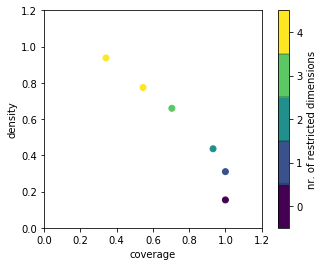

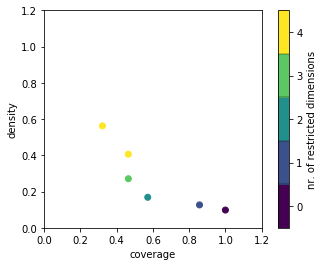

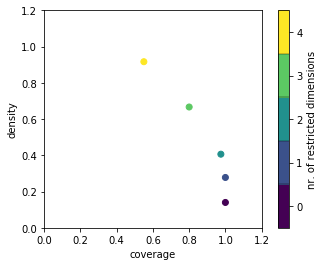

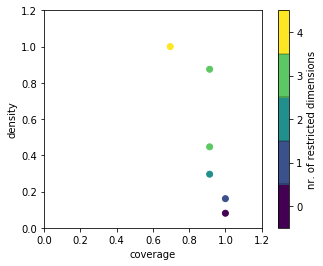

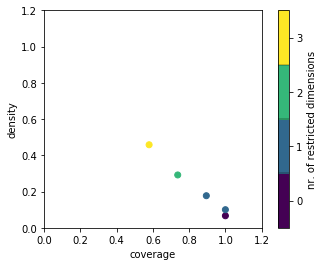

In [118]:
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
#plot1 = 
ax1 = box1_ssp1.show_tradeoff()
ax2 = box1_ssp2.show_tradeoff()
ax3 = box1_ssp3.show_tradeoff()
ax4 = box1_ssp4.show_tradeoff()
ax4 = box1_ssp5.show_tradeoff()

#Question for Bramka

Why does this show two plots?

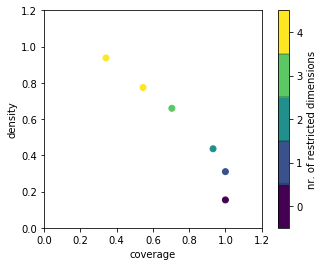

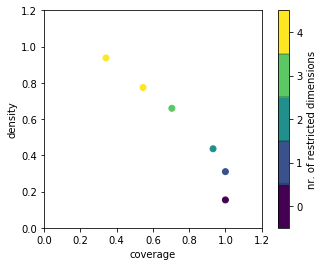

In [119]:
box1_ssp1.show_tradeoff()

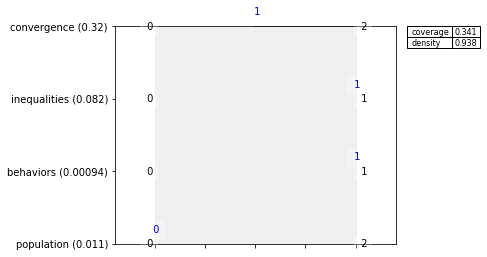

In [120]:
#Want 70% coverage, 65% density
#Inspect last candidate box
box1_ssp1.inspect(style = 'graph')
plt.show()

In [121]:
#SSP2
prim_alg_ssp2 = prim.Prim(x, SSP1, threshold=0.5, peel_alpha=0.05)
box1_ssp2 = prim_alg_ssp1.find_box()

[MainProcess/INFO] 270 points remaining, containing 29 cases of interest
[MainProcess/INFO] mean: 0.6875, mass: 0.055944055944055944, coverage: 0.25, density: 0.6875 restricted_dimensions: 4


# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [ ]:
#Example for pca_preprocess

'''

This file illustrated the use of the workbench for doing
a PRIM analysis with PCA preprocessing

The data was generated using a system dynamics models implemented in Vensim.
See flu_example.py for the code.


'''
import matplotlib.pyplot as plt

from ema_workbench import ema_logging, load_results
import ema_workbench.analysis.prim as prim

#
# .. codeauthor:: jhkwakkel <j.h.kwakkel (at) tudelft (dot) nl>

ema_logging.log_to_stderr(level=ema_logging.INFO)

# load data
fn = r'./data/1000 flu cases no policy.tar.gz'
x, outcomes = load_results(fn)

# specify y
y = outcomes['deceased population region 1'][:, -1] > 1000000

rotated_experiments, rotation_matrix = prim.pca_preprocess(x, y,
                                                           exclude=['model', 'policy'])

# perform prim on modified results tuple
prim_obj = prim.Prim(rotated_experiments, y, threshold=0.8)
box = prim_obj.find_box()

box.show_tradeoff()
box.inspect(22)
plt.show()


Trying to see if this matches with Figure 3 in Hamarat et al 

Question for Bramka

It does not entirely match. How then, can we replicate the final figure?

KeyError: 'TIME'

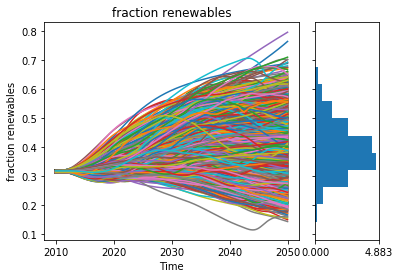

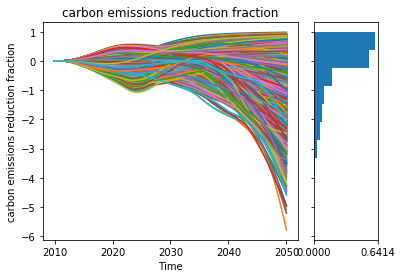

In [156]:
from ema_workbench.analysis import plotting, plotting_util

for outcome in outcomes.keys():
    plotting.lines(experiments, outcomes, outcomes_to_show=outcome, 
                   density=plotting_util.Density.HIST)
plt.show()

In [40]:
from ema_workbench import load_results, analysis
import numpy as np

In [139]:
data_hamarat = load_results(data_path + "\Hamarat et al 2013.gz")
experiments = data_hamarat[0]
experiments = experiments.select_dtypes(include=['float64'])
outcomes = data_hamarat[1]

[MainProcess/INFO] results loaded succesfully from C:\Users\sahit\EPA1361\epa1361_open\Week 3-4 - vulnerability analysis\data\Hamarat et al 2013.gz


In [138]:
outcomes['fraction renewables'][:,-1]

array([0.26695362, 0.44947988, 0.59928203, ..., 0.49639055, 0.38222334,
       0.31000748])

In [140]:
y = outcomes['fraction renewables'][:,-1] < 0.26695362

In [141]:
rotated_experiments, rotation_matrix = prim.pca_preprocess(experiments, y)

In [150]:
prim_alg_hamarat = prim.Prim(rotated_experiments, y, threshold = 0.4)
box1 = prim_alg_hamarat.find_box()

[MainProcess/INFO] 5000 points remaining, containing 238 cases of interest
[MainProcess/INFO] mean: 0.4942084942084942, mass: 0.0518, coverage: 0.5378151260504201, density: 0.4942084942084942 restricted_dimensions: 16


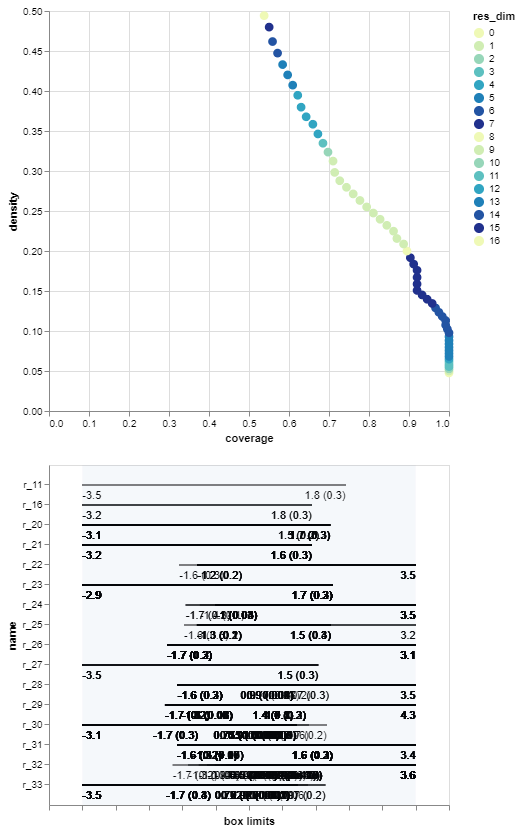

In [151]:
box1.inspect_tradeoff()